In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('kc_house_data.csv')

## Задача 1

### Изучите стоимости недвижимости

In [44]:
price = df['price'].value_counts()

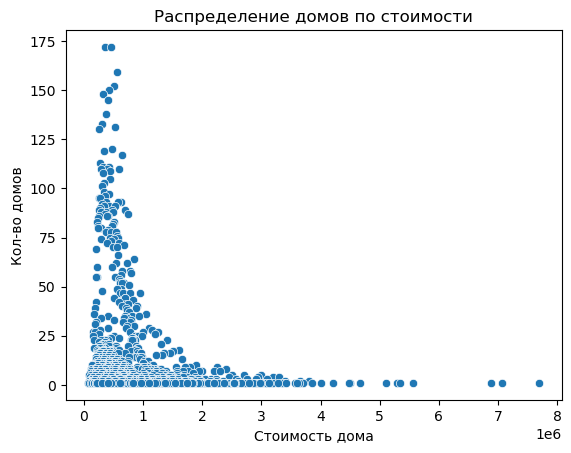

In [43]:
sns.scatterplot(data = price, x=price.index, y=price.values)
plt.xlabel('Стоимость дома')
plt.ylabel('Кол-во домов')
plt.title('Распределение домов по стоимости');

### Изучите распределение квадратуры жилой

In [52]:
surface = df['sqft_living'].value_counts()

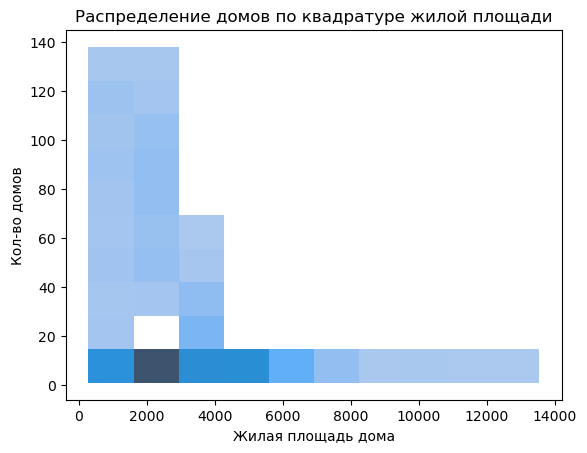

In [51]:
sns.histplot(data=surface, x=surface.index, y=surface.values, bins=10)
plt.xlabel('Жилая площадь дома')
plt.ylabel('Кол-во домов')
plt.title('Распределение домов по квадратуре жилой площади');

### Изучите распределение года постройки

In [55]:
years = df['yr_built'].value_counts()

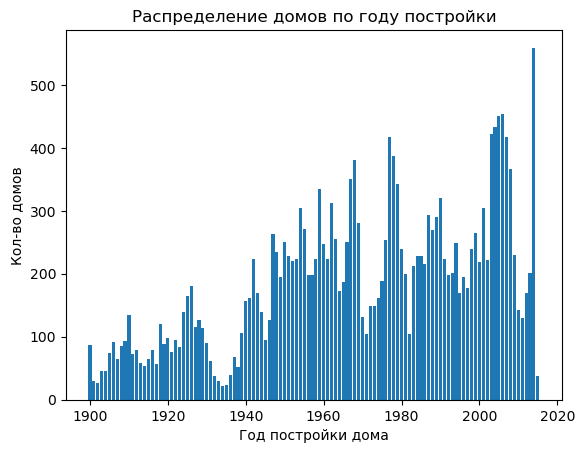

In [69]:
plt.bar(data=years, x=years.index, height=years.values)
plt.xlabel('Год постройки дома')
plt.ylabel('Кол-во домов')
plt.title('Распределение домов по году постройки');

## Задача 2

### Изучите распределение домов от наличия вида на набережную
### Постройте график
### Сделайте выводы

In [70]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [75]:
view = df['waterfront'].value_counts()
view

0    21450
1      163
Name: waterfront, dtype: int64

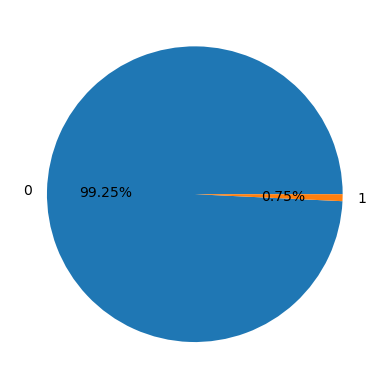

In [78]:
plt.pie(view, labels = view.index, autopct='%.2f%%');

#### Вывод: менее 1% всех домов из набора данных имеют вид на набережную

### Изучите распределение этажей домов

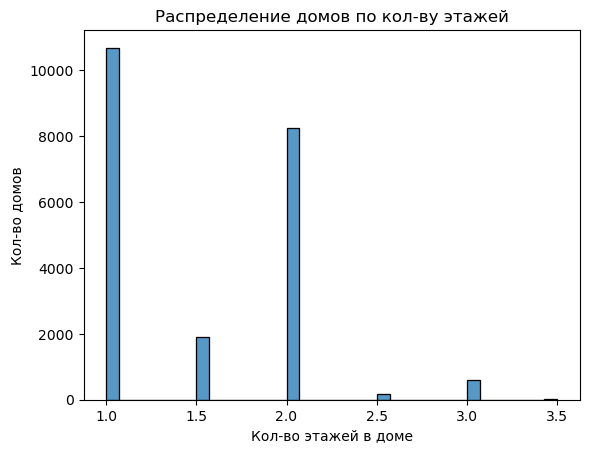

In [88]:
sns.histplot(df, x=df['floors'])
plt.xlabel('Кол-во этажей в доме')
plt.ylabel('Кол-во домов')
plt.title('Распределение домов по кол-ву этажей');

### Изучите распределение состояния домов

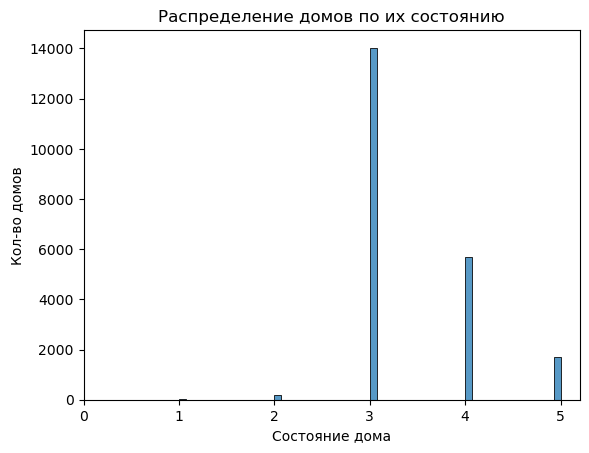

In [93]:
sns.histplot(df, x=df['condition'])
plt.xlabel('Состояние дома')
plt.ylabel('Кол-во домов')
plt.title('Распределение домов по их состоянию')
plt.xticks(np.arange(6));

## Задача 3

### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
### Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [103]:
corr = df.corr()
corr.iloc[1].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

### Применив матрицу корреляций и взяв из набора данных строку для характеристики `price`, заметим, что на цену влияют следующие признаки: жилая площадь, оценка, площадь верхний этажей и количество ванных комнат. Построим графики зависимостей цены от этих признаков.

### Зависимость цены от площади:

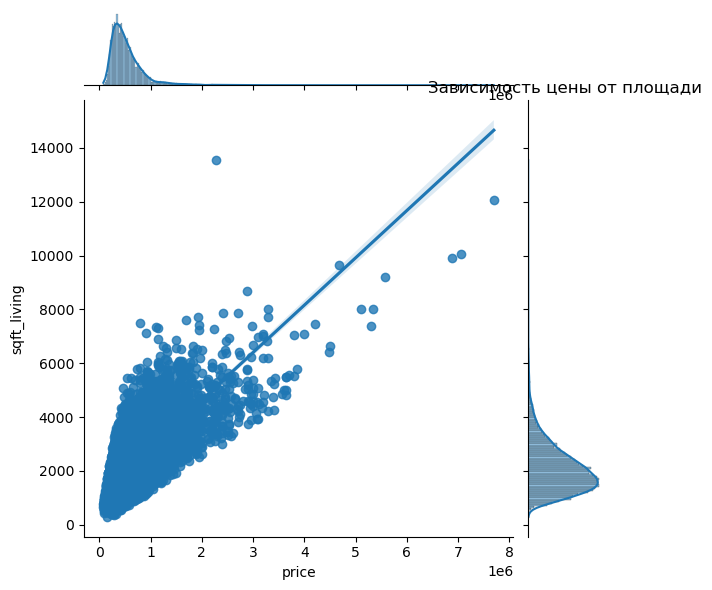

In [113]:
sns.jointplot(data=df, x=df['price'], y=df['sqft_living'], kind='reg');

### Зависимость цены от оценки:

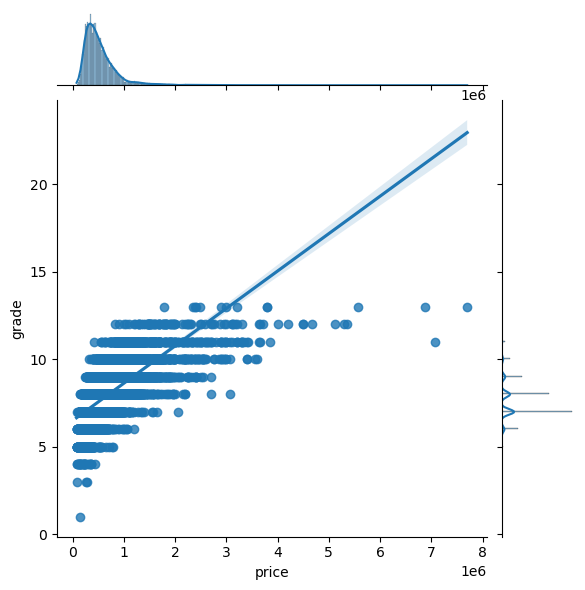

In [106]:
sns.jointplot(data=df, x=df['price'], y=df['grade'], kind='reg');

### Зависимость цены от площади верхних этажей:

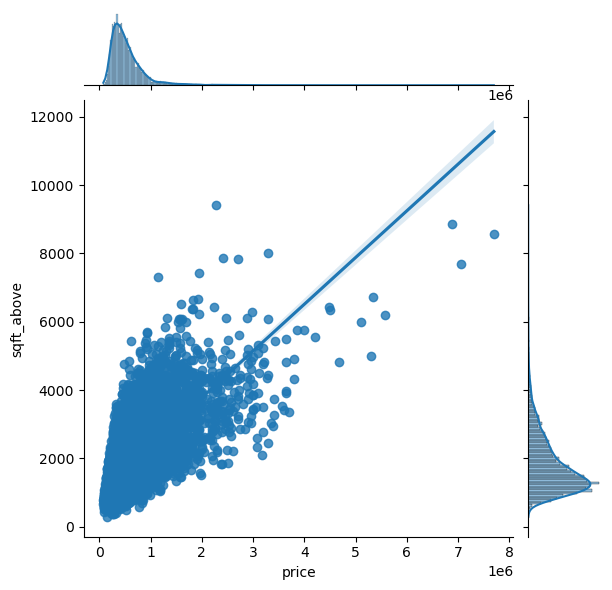

In [107]:
sns.jointplot(data=df, x=df['price'], y=df['sqft_above'], kind='reg');

### Зависимость цены от количества ванных комнат:

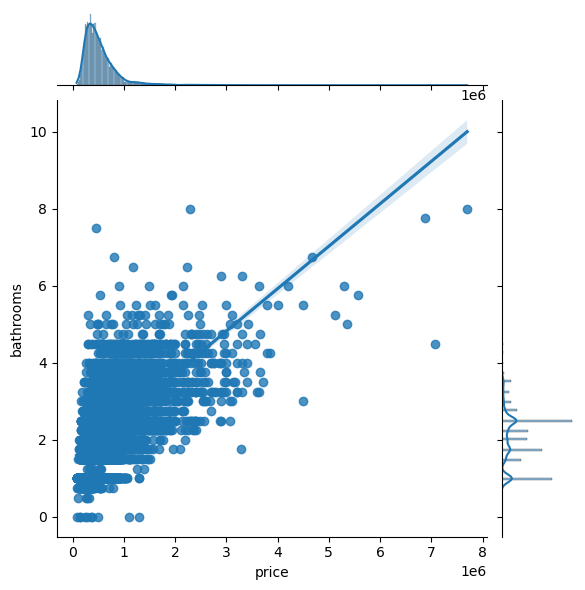

In [108]:
sns.jointplot(data=df, x=df['price'], y=df['bathrooms'], kind='reg');

### Как можно заметить, все эти графики коррелируют с признаком цена, поэтому можно предположить, что эти признаки будут влиять на итоговую стоимость дома. Чтобы убедиться, что некоторые признаки не влияют на стоимость, построим похожий график зависимости цены от признака со значением корреляции близким к нулю.

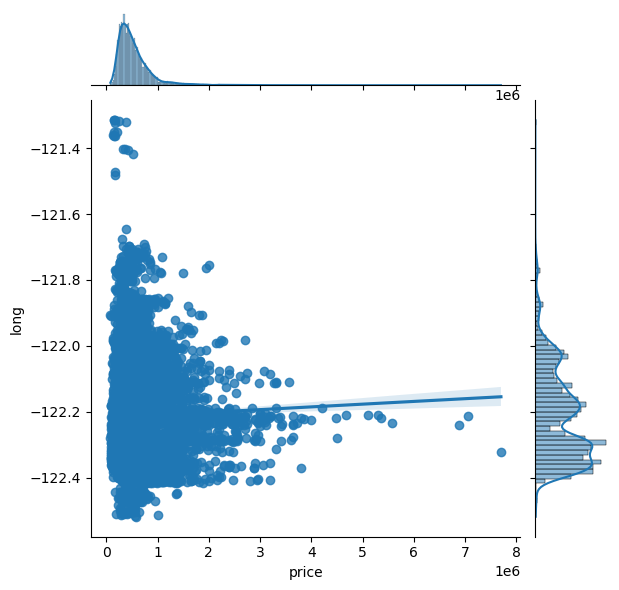

In [114]:
sns.jointplot(data=df, x=df['price'], y=df['long'], kind='reg');

### В данном случае мы видим, что цена не зависит от долготы, где находится дом. Значение корреляции между этими признаками 0,02.